# M.SAIRAM


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail=pd.read_csv("SampleSuperstore.csv")
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
uniqueCountry=retail.Country.unique()
uniqueShip=retail["Ship Mode"].unique()
uniqueSegment=retail.Segment.unique()
uniqueCategory=retail.Category.unique()
print("unique countries are",uniqueCountry)
print("unique shipmode are",uniqueShip)
print("unique segments are",uniqueSegment)
print("unique Categories are",uniqueCategory)


unique countries are ['United States']
unique shipmode are ['Second Class' 'Standard Class' 'First Class' 'Same Day']
unique segments are ['Consumer' 'Corporate' 'Home Office']
unique Categories are ['Furniture' 'Office Supplies' 'Technology']


In [ ]:
# Removing Country Column as there is only a single value
ret=retail.drop("Country",axis=1)


In [5]:
ret.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [15]:
ret.describe()
#75 percent of our profit is below 29.364 corresponding to which 75 percent of people are those who buy a product given at discount=.2

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
ret.groupby('Category').sum()
#the most sold category is Office supplies
#the most profit generating is Technology
#The least profitgenerating/loss making is Furniture

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


In [9]:
table = pd.pivot_table(ret, values='Profit', index=['Category'],
                    columns=['Segment'], aggfunc=np.sum)
table
#Consumer class is the dominant segment in Office Supplies and Furniture
#Corporate class is dominant in Furniture

Segment,Consumer,Corporate,Home Office
Category,,,
Furniture,6991.0786,7584.8158,3875.3784
Office Supplies,56330.3210,40227.3202,25933.1596
Technology,70797.8096,44166.9980,30490.1405


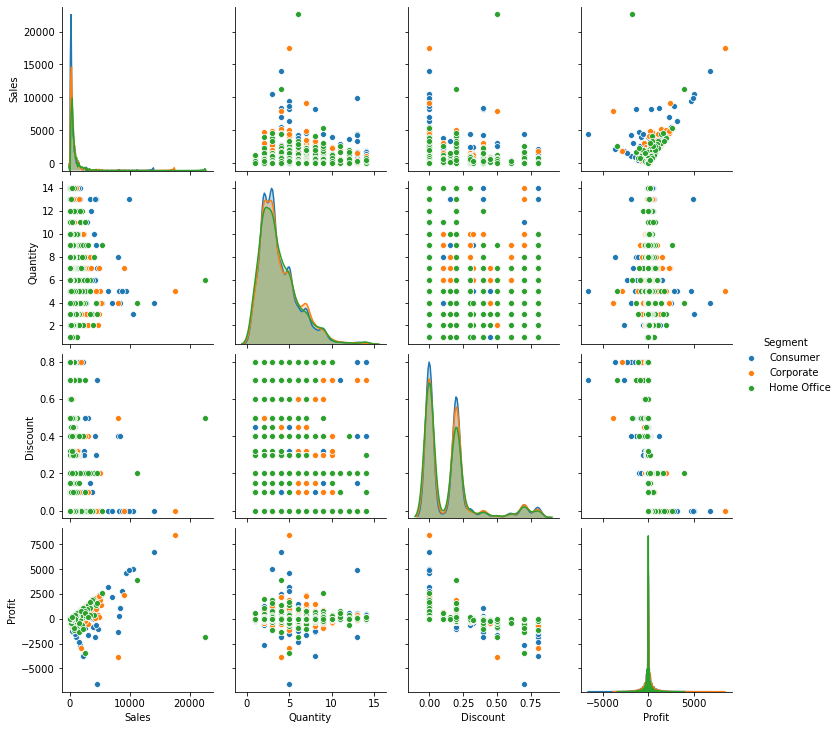

In [19]:
#we observe there is a correlation only between Sales and Profit
ret1=ret.drop("Postal Code",axis=1)
sns.pairplot(ret1,hue='Segment')

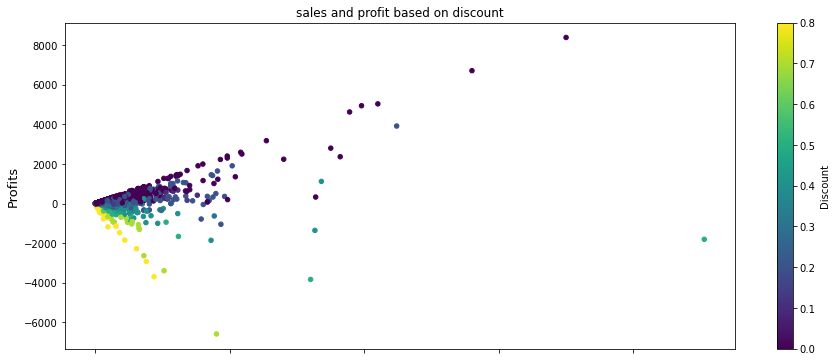

In [21]:
ret1.plot(kind = "scatter", figsize = (15,6), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="o",colormap ="viridis")
plt.ylabel("Sales",fontsize =13)
plt.ylabel("Profits",fontsize =13)
plt.title("sales and profit based on discount")
plt.show()

In [22]:
#Sales and Profit values both seem to increase with low level of discounts
#Sales and Profit values both decrease as the discount rate tends to the maximum discount rate

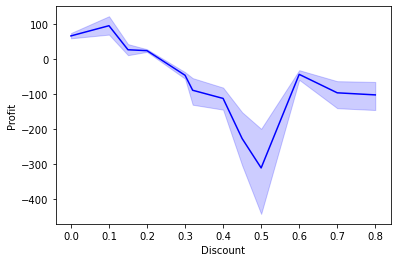

In [51]:
sns.lineplot(x = "Discount", y = "Profit", data = ret1, color = "blue")
plt.show()
#we try to findout what kind of products were bought from what categories to the loss making discount rate

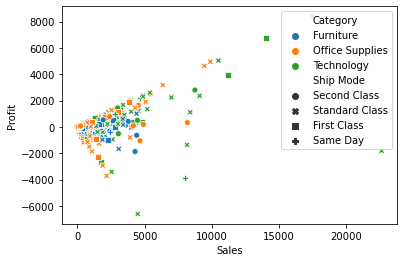

In [27]:
sns.scatterplot(x="Sales", y="Profit",
                     hue="Category", style="Ship Mode", data=ret1)
plt.show()

In [ ]:
#We observe Profit Goes Down as Sales Increases mostly for Standard Class Ship mode for Office Supply and Technology


In [34]:
table2 = pd.pivot_table(ret1, values='Profit', index=['Category'],
                    columns=['Ship Mode'], aggfunc=np.sum)
table3 = pd.pivot_table(ret, values='Quantity', index=['Category'],
                    columns=['Ship Mode'], aggfunc=np.sum)
print(table2)
print(table3)

Ship Mode        First Class   Same Day  Second Class  Standard Class
Category                                                             
Furniture          3066.9474   797.3484     4226.2614      10360.7156
Office Supplies   18400.3291  6423.5192    27068.1676      70598.7849
Technology        27502.5634  8670.8913    26152.2064      83129.2870
Ship Mode        First Class  Same Day  Second Class  Standard Class
Category                                                            
Furniture               1238       453          1569            4768
Office Supplies         3372      1147          4480           13907
Technology              1083       360          1374            4122


In [35]:
#The most Profitable and Most Shipped shipmode is the standard Class
#The Most quantity shipped is the Office Supplies Category
#The Most Profit Generating is Technology category
#The Least Profitable and least Shipped shipmode is the Same Day

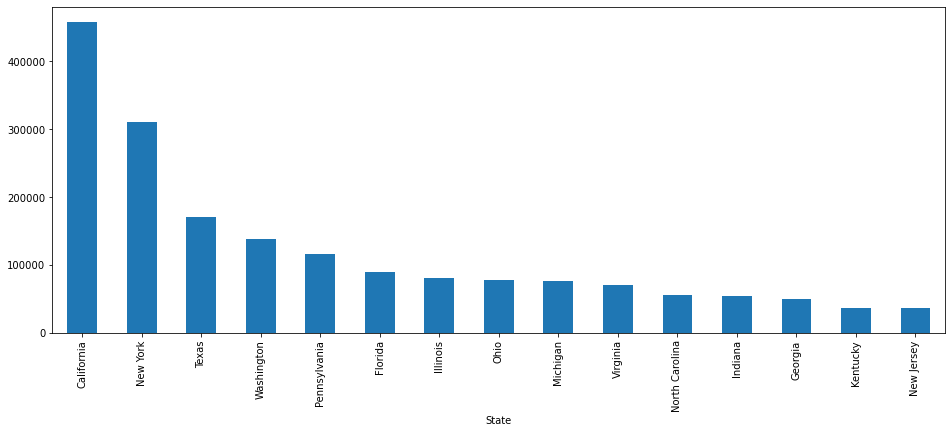

In [47]:
#Top 5 
plt.figure(figsize=(16,6))
ret1.groupby('State')['Sales'].sum().nlargest(15).plot.bar()
plt.show()

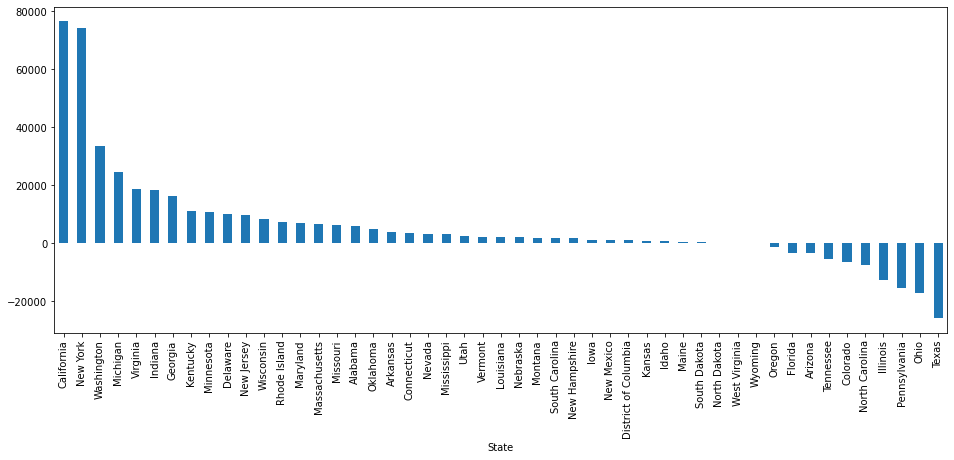

In [45]:
plt.figure(figsize=(16,6))
ret1.groupby('State')['Profit'].sum().nlargest(n=ret1['State'].nunique()).plot.bar()
plt.show()

In [46]:
#Top 5 Profit states(California,New york,Washington,Michigan,Virginia)
#Top 5 Loss Making states(Texas,Ohio,Pennsylvania,Illinois,North Carolina)
#We observed that Pennsylvania and Texas were in top 5 sales, that means we need to think about the discounts given in these states

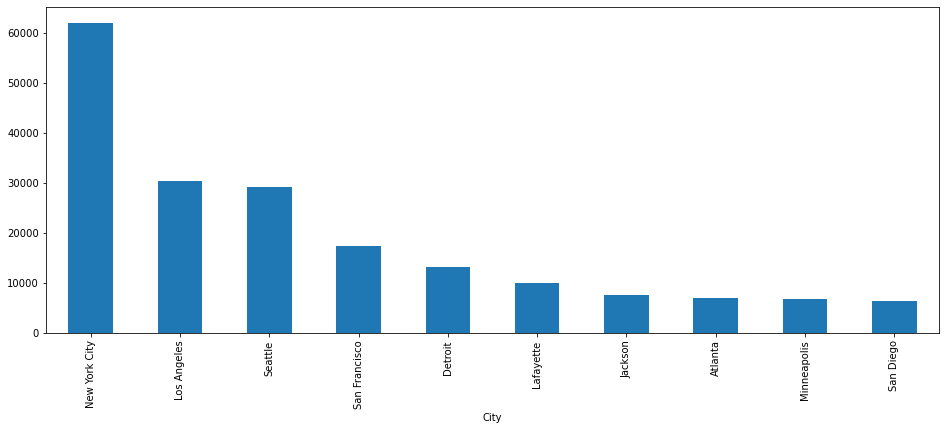

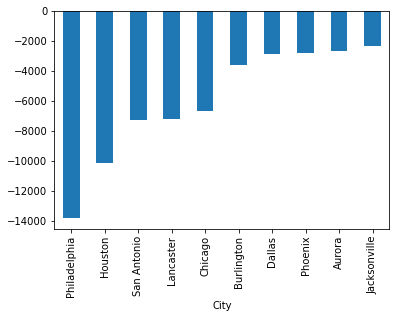

In [60]:
plt.figure(figsize=(16,6))
ret1.groupby('City')['Profit'].sum().nlargest(10).plot.bar()
plt.show()
ret1.groupby('City')['Profit'].sum().nsmallest(10).plot.bar()
plt.show()
#we have the top 10 profit generating cities
#we have the top 10 loss generating cities

Text(0.5, 1.0, 'Region-wise Distribution')

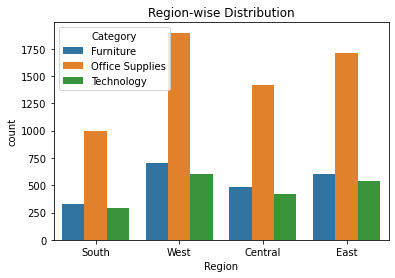

In [52]:
sns.countplot(x=ret1['Region'], hue=ret1['Category'])
plt.title('Region-wise Distribution')
#based on the data we see that West and East are doing good
#South and central we need to look further and take further marketing or resource optimization decisons

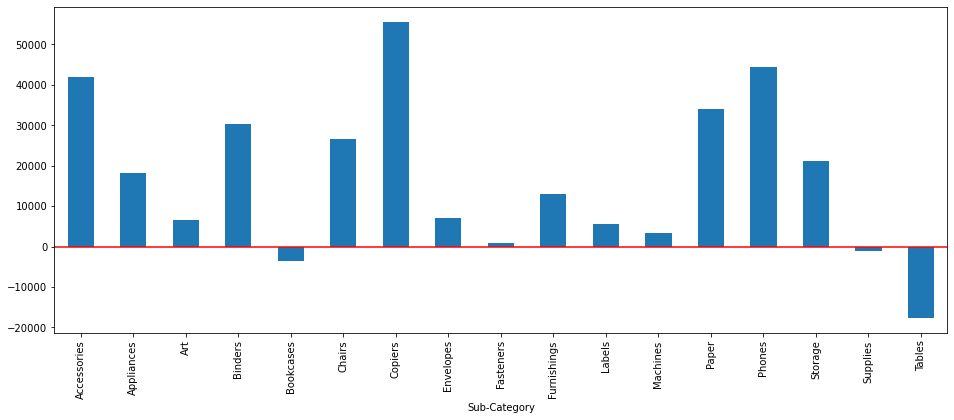

In [56]:
plt.figure(figsize=(16,6))
ret1.groupby('Sub-Category')['Profit'].sum().plot.bar()
ax = plt.gca()
ax.axhline(0, color="red")
plt.show()
#Copiers,Binders,Accessories,Phones and Paper are Profit generating
#tables and Bookcases are Loss generating